In [283]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
trial_data = pd.read_csv(clinical_trial_data_to_load)
mouse_data = pd.read_csv(mouse_drug_data_to_load)
# mouse_data

# Combine the data into a single dataset
merged_data = trial_data.merge(mouse_data, on = 'Mouse ID')
# merged_data.head()



## Tumor Response to Treatment

In [284]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_vol = pd.DataFrame(merged_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"])
# Convert to DataFrame
# avgvol_df = pd.DataFrame(mean_vol)
# avgvol_df

# Preview DataFrame
# mean_vol.head()

In [219]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# stderror_vol = pd.DataFrame(stats.sem(mean_vol))
# stderror_vol
sem_vol = pd.DataFrame(merged_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"])
# Convert to DataFrame
sem_vol = sem_vol.rename(columns = {"Tumor Volume (mm3)": "Standard Error"})
# Preview DataFrame
# sem_vol.head()



In [285]:
# Minor Data Munging to Re-Format the Data Frames
mean_vol_pivot = pd.pivot_table(mean_vol, index=["Timepoint"], values="Tumor Volume (mm3)", columns=["Drug"])
mean_vol_pivot = mean_vol_pivot.drop(columns =['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
# Preview that Reformatting worked
# mean_vol_pivot

In [286]:
# Minor Data Munging to Re-Format the Data Frames
sem_vol_pivot = pd.pivot_table(sem_vol, index=["Timepoint"], values="Standard Error", columns=["Drug"])
sem_vol_pivot = sem_vol_pivot.drop(columns =['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
# sem_vol_pivot = ["Capomulin", "Infubinol", "Ketapril","Placebo"]

# Preview that Reformatting worked
# sem_vol_pivot

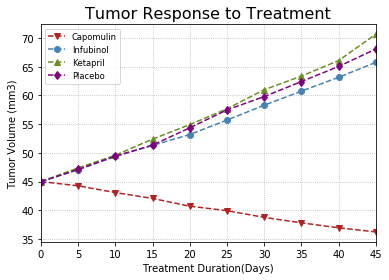

In [287]:
# Generate the Plot (with Error Bars)
drugs=["Capomulin", "Infubinol", "Ketapril","Placebo"]
colors=["firebrick","steelblue","olivedrab","purple"]
markers=["v","o","^","d"]

fig, ax = plt.subplots()
# x_axis
# print(fig, ax)
count = 0 

for drug in drugs:
    x_axis =mean_vol_pivot.index
    plt.plot(x_axis, mean_vol_pivot[drug], linestyle='--', marker=markers[count], color=colors[count], label=drug, markeredgecolor = colors[count], markerfacecolor=colors[count])
#     plt.errorbar(x_axis, mean_vol_pivot[drug], sem_vol_pivot[drug])
    count +=1  
    
# The rest of the plot formatting
plt.title("Tumor Response to Treatment", fontsize=16)
plt.legend(loc="best", fontsize = "small", fancybox = True)
ax.set_xlim(0,45)
ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid(linestyle='dotted')


# plt.errorbar(mean_vol_pivot, count, sem_vol_pivot, linestyle = "--")
# plt.legend(drugs, markers)
# plt.errorbar(mean_vol_pivot, yeer=sem_vol_pivot)
plt.show()




In [288]:
# Save the Figure
# Show the PNG

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [289]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint # Convert to DataFrame
mean_sites = pd.DataFrame(merged_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"])

# Preview DataFrame
# mean_sites.head()

In [290]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint # Convert to DataFrame
sem_sites = pd.DataFrame(merged_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"])
sem_sites = sem_sites.rename(columns = {"Metastatic Sites": "Standard Error"})

# Preview DataFrame
# sem_sites.head()

In [291]:
# Minor Data Munging to Re-Format the Data Frames
mean_sites_pivot = pd.pivot_table(mean_sites, index=["Timepoint"], values="Metastatic Sites", columns=["Drug"])
mean_sites_pivot = mean_sites_pivot.drop(columns =['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
# Preview that Reformatting worked
# mean_sites_pivot

In [292]:
# Minor Data Munging to Re-Format the Data Frames
sem_sites_pivot = pd.pivot_table(sem_sites, index=["Timepoint"], values="Standard Error", columns=["Drug"])
sem_sites_pivot = sem_sites_pivot.drop(columns =['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
# sem_vol_pivot = ["Capomulin", "Infubinol", "Ketapril","Placebo"]

# Preview that Reformatting worked
# sem_vol_pivot

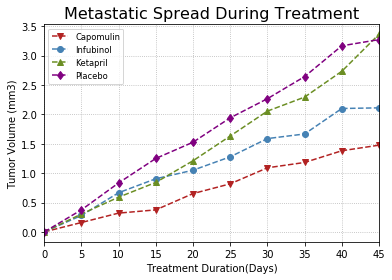

In [293]:
fig, ax = plt.subplots()
# x_axis
# print(fig, ax)
count = 0 

for drug in drugs:
    x_axis =mean_sites_pivot.index
    plt.plot(x_axis, mean_sites_pivot[drug], linestyle='--', marker=markers[count], color=colors[count], label=drug, markeredgecolor = colors[count], markerfacecolor=colors[count])
#     plt.errorbar(x_axis, mean_vol_pivot[drug], sem_vol_pivot[drug])
    count +=1  
    
# The rest of the plot formatting
plt.title("Metastatic Spread During Treatment", fontsize=16)
plt.legend(loc="best", fontsize = "small", fancybox = True)
ax.set_xlim(0,45)
ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid(linestyle='dotted')

plt.show()


In [294]:
# Save the Figure
# Show the PNG

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [295]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) & Convert to DataFrame
mouse_count = pd.DataFrame(merged_data.groupby(["Drug","Timepoint"]).count()["Mouse ID"])
mouse_count = mouse_count.rename(columns = {"Mouse ID": "Survivals"})
# ["Mouse Count"])

# Preview DataFrame
mouse_count.head()

Survivals
Drug      Timepoint           
Capomulin 0                 25
          5                 25
          10                25
          15                24
          20                23

In [299]:
# Minor Data Munging to Re-Format the Data Frames & Preview the Data Frame
mouse_count_pivot = pd.pivot_table(mouse_count, index=["Timepoint"], values="Survivals", columns=["Drug"])
mouse_count_pivot = mouse_count_pivot.drop(columns =['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
mouse_count_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


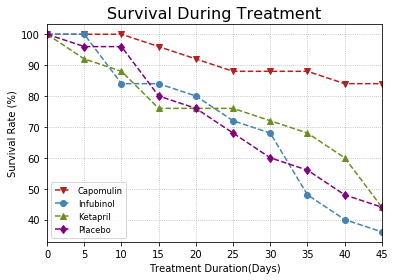

In [304]:
fig, ax = plt.subplots()
# x_axis
# print(fig, ax)
count = 0 

for drug in drugs:
    x_axis =mouse_count_pivot.index
    y_data=(mouse_count_pivot[drug] * 100) / mouse_count_pivot[drug][0]

    plt.plot(x_axis, y_data, linestyle='--', marker=markers[count], color=colors[count], label=drug, markeredgecolor = colors[count], markerfacecolor=colors[count])
#     plt.errorbar(x_axis, mean_vol_pivot[drug], sem_vol_pivot[drug])
    count +=1  
    
# The rest of the plot formatting
plt.title("Survival During Treatment", fontsize=16)
plt.legend(loc="best", fontsize = "small", fancybox = True)
ax.set_xlim(0,45)
ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Survival Rate (%)")
plt.grid(linestyle='dotted')

plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)